In [1]:
cd ..

/Users/clementmarie/ML/SORBONNE/PROJET_IN013


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score 

In [3]:
from modules import classif

In [4]:
df_stopwords = pd.read_csv('data/files/data_preprocess_avec_stopwords.csv')
df_wo_stopwords = pd.read_csv('data/files/data_preprocess_sans_stopwords.csv')

df_stopwords = df_stopwords.dropna(inplace=False)
df_wo_stopwords = df_wo_stopwords.dropna(inplace=False)

df_stopwords = df_stopwords.reset_index(drop=True)
df_wo_stopwords = df_wo_stopwords.reset_index(drop=True)

In [5]:
df_stopwords['positive'] = df_stopwords['note'] > 5.0
df_wo_stopwords['positive'] = df_wo_stopwords['note'] > 5.0

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_wo_stopwords['comment'], df_wo_stopwords['positive'])

In [7]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

### undersampling the majority class

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
y_train_hist = le.fit_transform(y_train)

(array([ 20216.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 120010.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

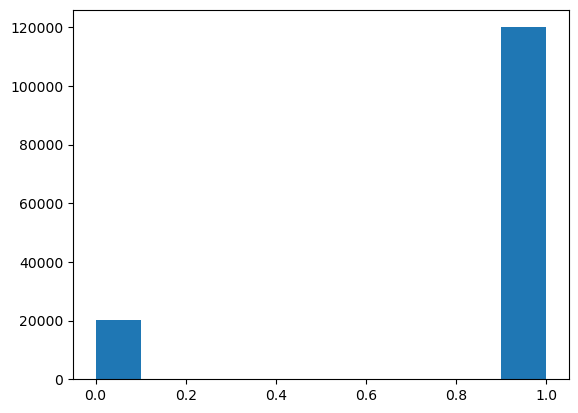

In [10]:
plt.hist(y_train_hist)

In [11]:
df_wo_stopwords['positive'].value_counts()

True     159964
False     27004
Name: positive, dtype: int64

In [17]:
X_positive_samples = df_wo_stopwords['comment'][df_wo_stopwords['positive'] == True]
X_negative_samples = df_wo_stopwords['comment'][df_wo_stopwords['positive'] == False]

In [18]:
undersampled_pos_samples = X_positive_samples[:len(X_negative_samples)]

In [19]:
X_balanced = np.concatenate((X_negative_samples, undersampled_pos_samples))
y_balanced = np.concatenate((np.zeros(len(X_negative_samples)), np.ones(len(undersampled_pos_samples))), axis = 0)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_wo_stopwords['comment'], df_wo_stopwords['positive'])

In [21]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, random_state=42)

In [22]:
X_train_bal, y_train_bal, X_test, y_test

(array(['alor heu cest jeu ou doit simpl avoir tet mem associ dimag partenair evoqu mot conceptchacun dispos cel paquet plus cart lesquel trouv tout ser photos tre varie represent objet situat chos concret abstrait symbol couleursj dois dir jeu sous abord plutot simpl assez hasard premi tour prend vit tournur psy faut imper mettr virtuel letat despr partenair auss trouv mem combinaisonslinconvenient depart parfois divergent total represent ca commenc friction partenair premier part femm bout dun moment commenc suivr delir fameux mait serv tout sauc moindr occas alor femm perdion fait remonte total combinaison total parfait plac mem cart exact ordre plutot improb mathemat parlantau final mal damus regl tre facil suivrejen fer volonti part temp temp nest plus trouvabl march loccas',
        'ben voil vrai jeu daffront bien concu trop de lhorizon cart action equip deux guerri asymetriquesl terrain pet cachet ca cogn tout vacolor tre bien si enfant pre adolescent',
        'sup jeu complet

## Naive bayes

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

In [40]:
cv = CountVectorizer()
X_train_vect = cv.fit_transform(X_train)
y_train_vect = y_train

In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
nb = MultinomialNB()

In [43]:
nb.fit(X_train_vect, y_train_vect)

MultinomialNB()

In [44]:
X_train_vect

<140226x189371 sparse matrix of type '<class 'numpy.int64'>'
	with 7611063 stored elements in Compressed Sparse Row format>

In [45]:
X_test_vect = cv.transform(X_test)
y_test_vect = y_test

In [46]:
y_test_predict = nb.predict(X_test_vect)
accuracy_score(y_test, y_test_predict)

0.8813272859526764

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [48]:
print(confusion_matrix(y_test, y_test_predict))

[[ 1947  4837]
 [  710 39248]]


In [49]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

       False       0.73      0.29      0.41      6784
        True       0.89      0.98      0.93     39958

    accuracy                           0.88     46742
   macro avg       0.81      0.63      0.67     46742
weighted avg       0.87      0.88      0.86     46742



In [32]:
f1_score(y_test, y_test_predict)

0.9336664287413752

### undersampling

In [50]:
cv = CountVectorizer()
X_train_bal_vect = cv.fit_transform(X_train_bal)
y_train_bal_vect = y_train_bal

In [56]:
X_test_bal_vect = cv.transform(X_test)
y_test_bal_vect = y_test

In [57]:
nb = MultinomialNB()
nb.fit(X_train_bal_vect, y_train_bal_vect)

MultinomialNB()

In [58]:
y_test_bal_predict = nb.predict(X_test_bal_vect)

In [59]:
X_test_bal_vect

<46742x74951 sparse matrix of type '<class 'numpy.int64'>'
	with 2470225 stored elements in Compressed Sparse Row format>

In [62]:
print(confusion_matrix(y_test, y_test_bal_predict))

[[ 6061   723]
 [11459 28499]]


In [65]:
print(classification_report(y_test, y_test_bal_predict))

              precision    recall  f1-score   support

       False       0.35      0.89      0.50      6784
        True       0.98      0.71      0.82     39958

    accuracy                           0.74     46742
   macro avg       0.66      0.80      0.66     46742
weighted avg       0.88      0.74      0.78     46742



In [66]:
f1_score(y_test, y_test_bal_predict)

0.8239086441167968

## Cross val

In [33]:
from sklearn.model_selection import cross_val_score

In [36]:
scores = cross_val_score(nb, X_train_vect, y_train, cv=10)

In [38]:
scores.mean()

0.8686619531966215

## Learning curves

In [139]:
nb_curves = MultinomialNB()

In [140]:
def plot_learning_curves(model, X_train, X_test, y_train, y_test):
    train_errors, val_errors = [], []
    for m in range(1, X_train.shape[0], 1000):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(f1_score(y_train[:m], y_train_predict))
        val_errors.append(f1_score(y_test, y_test_predict))
        
    plt.plot(np.sqrt(train_errors[5:]), 'r-+', label='train')
    plt.plot(np.sqrt(val_errors[5:]), 'b-', label='val')
    plt.xlabel("Training set size", fontsize=12)
    plt.ylabel("F1-score", fontsize=12)
    plt.legend()

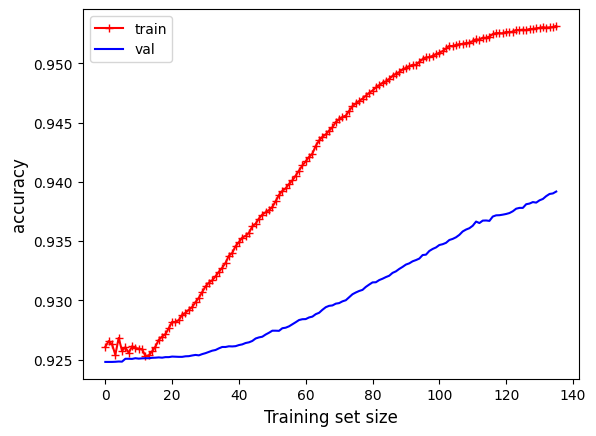

In [75]:
plot_learning_curves(nb_curves, X_train_vect, X_test_vect, y_train, y_test)

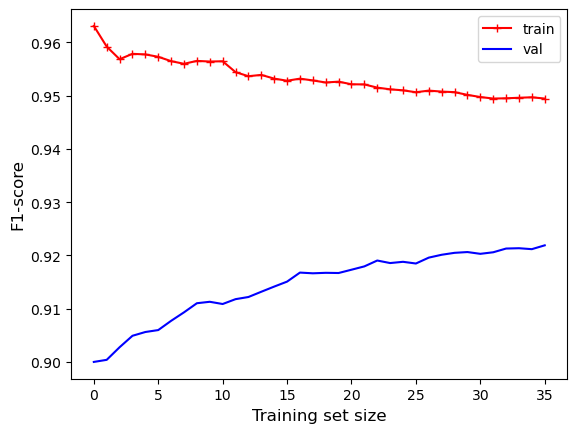

In [141]:
plot_learning_curves(nb_curves, X_train_bal_vect, X_test_bal_vect, y_train_bal_vect, y_test_bal_vect)

#### the training and testing accuracy increase with the training size so adding more data is relevant. starting from 140k rows, the training accuracy starts to plateau so it's probably the best fit we can do. 

## testing with own code

In [9]:
p_pos, p_neg, parameters_pos, parameters_neg = classif.naive_bayes_train(X_train[:10_000], y_train[:10_000])

100%|███████████████████████████████████| 30000/30000 [00:14<00:00, 2014.18it/s]


In [10]:
p_pos, p_neg

(0.8596, 0.1404)

In [11]:
import operator
pos_words = list(dict(sorted(parameters_pos.items(), key=operator.itemgetter(1), reverse=True)))[:100]
neg_words = list(dict(sorted(parameters_neg.items(), key=operator.itemgetter(1), reverse=True)))[:100]

## Positive words

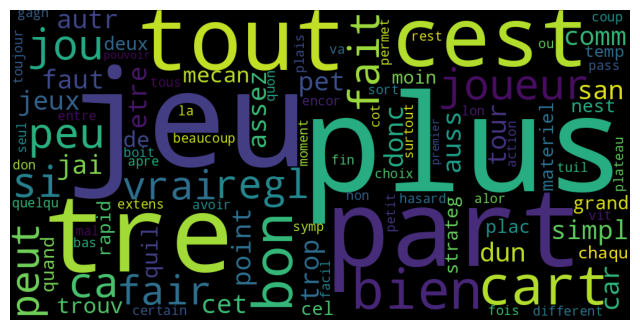

In [12]:
unique_string=(" ").join(pos_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Negative words

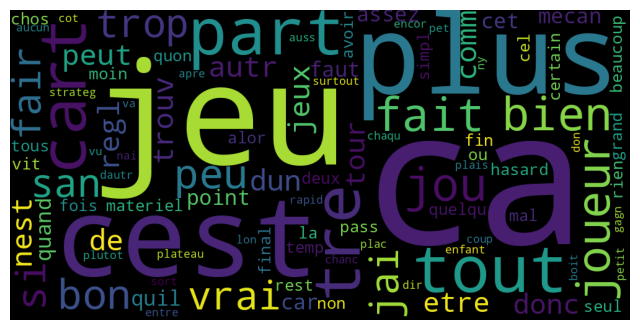

In [13]:
unique_string_2=(" ").join(neg_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string_2)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## checking accuracy

In [12]:
results = pd.DataFrame()
results['predicted'] = X_train.apply(lambda x: classif.classify_review(
    x, p_pos, p_neg, parameters_pos, parameters_neg))
results['true'] = y_train
results[results['true'] == True] = 1
results[results['true'] == False] = 0

In [14]:
pred, true = results['predicted'].values, results['true'].values
results['correct'] = (pred == true)
results['correct'].value_counts(normalize=True)

True    1.0
Name: correct, dtype: float64

In [28]:
results['predicted'].values.dtype

dtype('int64')

In [32]:
results['true'] = results['true'].astype('int64')

In [34]:
accuracy_score(np.array(results['predicted'].values), np.array(results['true'].values))

1.0

In [37]:
results['predicted']

0         0
1         0
2         1
3         1
4         1
         ..
140221    0
140222    1
140223    1
140224    1
140225    0
Name: predicted, Length: 140226, dtype: int64

### testing

In [43]:
results_test = pd.DataFrame()
results_test['predicted'] = X_test.apply(lambda x: classif.classify_review(
    x, p_pos, p_neg, parameters_pos, parameters_neg))
results_test['true'] = y_train
results_test['true'] = results_test['true'].astype('int64')
results_test[results_test['true'] == True] = 1
results_test[results_test['true'] == False] = 0

In [44]:
pred, true = results_test['predicted'].values, results_test['true'].values
results_test['correct'] = (pred == true)
results_test['correct'].value_counts(normalize=True)

True    1.0
Name: correct, dtype: float64

In [36]:
accuracy_score(np.array(results_test['predicted'].values), np.array(results_test['true'].values))

1.0